# Comparing the melting layers detected from KMUX radar vs ERA5

In this notebook, I compare the melting layer altitudes from ERA5 and compare it with melting layer altitudes from the KMUX radar.

In [5]:
%pylab inline 
#this imports numpy as np and matplotlib as plt

#import os
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


In [6]:
df_radar = pd.read_csv('KMUX_MeltingLayer_heights.csv')
df_radar['DateTime'] = pd.to_datetime(df_radar['DateTime'])
df_radar.set_index('DateTime', inplace=True)

In [3]:
df_era5 = pd.read_csv('ERA5_MeltingLayer_height.csv',parse_dates =True)
df_era5.index = pd.DatetimeIndex(df_era5["Unnamed: 0"])

In [5]:
df_radar.head().index

DatetimeIndex(['1996-01-15', '1996-01-16', '1996-01-17', '1996-01-18',
               '1996-01-19'],
              dtype='datetime64[ns]', name='DateTime', freq=None)

In [6]:
df_era5.head().index

DatetimeIndex(['1996-01-01 00:00:00', '1996-01-01 01:00:00',
               '1996-01-01 02:00:00', '1996-01-01 03:00:00',
               '1996-01-01 04:00:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', freq=None)

In [7]:
start_date = '1996-01-01'
end_date = '2019-06-10'

df_era5_2000 =  df_era5[(df_era5.index > start_date) & (df_era5.index <= end_date)]
df_radar_2000 =  df_radar[(df_radar.index > start_date) & (df_radar.index <= end_date)]

In [8]:
df_era5_2000 = df_era5_2000.resample('1M').mean()
df_radar_2000 = df_radar_2000.resample('1M').mean()

(728659.0, 737220.0)

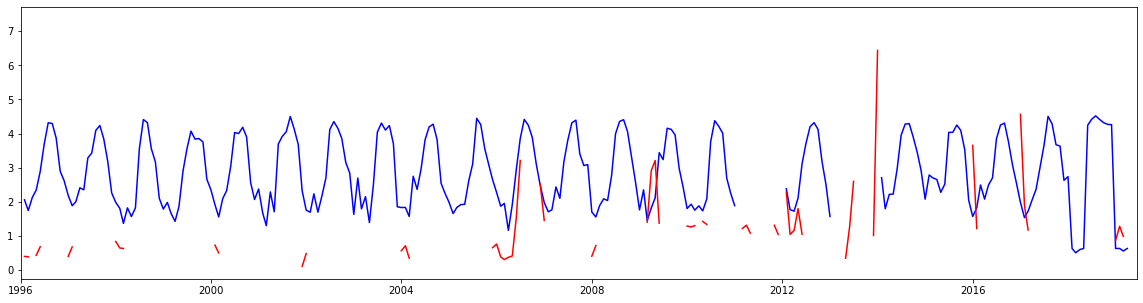

In [9]:
fig = plt.figure(figsize=(20,5))
plt.plot_date(df_era5_2000.index, df_era5_2000.Height/1000., 'b-')
plt.plot(df_radar_2000.index, df_radar_2000.MeltingLayerHeight, 'r-')
plt.xlim((pd.Timestamp(start_date),pd.Timestamp(end_date)))

In [10]:
df_era5_2000 = df_era5_2000.resample('3Y').mean()
df_radar_2000 = df_radar_2000.resample('3Y').mean()

(728659.0, 737220.0)

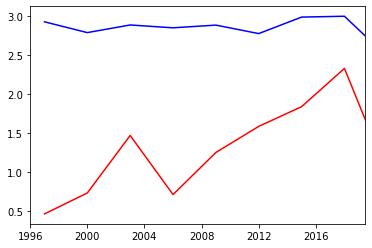

In [11]:
plt.plot_date(df_era5_2000.index, df_era5_2000.Height/1000., 'b-')
plt.plot(df_radar_2000.index, df_radar_2000.MeltingLayerHeight, 'r-')
plt.xlim((pd.Timestamp(start_date),pd.Timestamp(end_date)))

In [12]:
df_era5.rename(columns={'Unnamed: 0':'DateTime'}, inplace=True)
df_radar.rename(columns={'DateTime.1':'Date'}, inplace=True)

In [13]:
df_era5['Year'] = df_era5.index.year
df_era5['Month'] = df_era5.index.month
df_era5['Day'] = df_era5.index.day
df_era5['Date'] = df_era5.index.date
df_era5['Height'] = df_era5['Height']/1000.

df_radar['Month'] = df_radar.index.month
df_radar['Day'] = df_radar.index.day
df_radar['Date'] = df_radar.index.date

In [14]:
df_era5.head()

,DateTime,Height,Year,Month,Day,Date
Unnamed: 0,,,,,,
1996-01-01 00:00:00,1996-01-01 00:00:00,2.947182,1996,1,1,1996-01-01
1996-01-01 01:00:00,1996-01-01 01:00:00,2.945736,1996,1,1,1996-01-01
1996-01-01 02:00:00,1996-01-01 02:00:00,NaN,1996,1,1,1996-01-01
1996-01-01 03:00:00,1996-01-01 03:00:00,3.551422,1996,1,1,1996-01-01
1996-01-01 04:00:00,1996-01-01 04:00:00,3.556488,1996,1,1,1996-01-01


In [15]:
df_radar.head()

,Date,MeltingLayerHeight,Location,Year,Month,Day
DateTime,,,,,,
1996-01-15,1996-01-15,NaN,sea,1996.0,1,15
1996-01-16,1996-01-16,0.439833,sea,1996.0,1,16
1996-01-17,1996-01-17,NaN,NaN,NaN,1,17
1996-01-18,1996-01-18,0.357545,sea,1996.0,1,18
1996-01-19,1996-01-19,0.928733,sea,1996.0,1,19


In [16]:
df_combined = pd.merge(df_era5, df_radar, on=["Date","Year","Month","Day"], how = 'inner')

In [17]:
df_combined.head()

,DateTime,Height,Year,Month,Day,Date,MeltingLayerHeight,Location
0,1996-01-15 00:00:00,NaN,1996,1,15,1996-01-15,NaN,sea
1,1996-01-15 00:00:00,NaN,1996,1,15,1996-01-15,0.107,land
2,1996-01-15 01:00:00,NaN,1996,1,15,1996-01-15,NaN,sea
3,1996-01-15 01:00:00,NaN,1996,1,15,1996-01-15,0.107,land
4,1996-01-15 02:00:00,NaN,1996,1,15,1996-01-15,NaN,sea


In [18]:
df_ML = df_combined.dropna(subset = ['Height','MeltingLayerHeight'])

In [19]:
df_ML.head()

,DateTime,Height,Year,Month,Day,Date,MeltingLayerHeight,Location
29,1996-01-15 14:00:00,2.367614,1996,1,15,1996-01-15,0.107,land
31,1996-01-15 15:00:00,2.368417,1996,1,15,1996-01-15,0.107,land
33,1996-01-15 16:00:00,2.368248,1996,1,15,1996-01-15,0.107,land
35,1996-01-15 17:00:00,2.367844,1996,1,15,1996-01-15,0.107,land
37,1996-01-15 18:00:00,2.367224,1996,1,15,1996-01-15,0.107,land


No handles with labels found to put in legend.


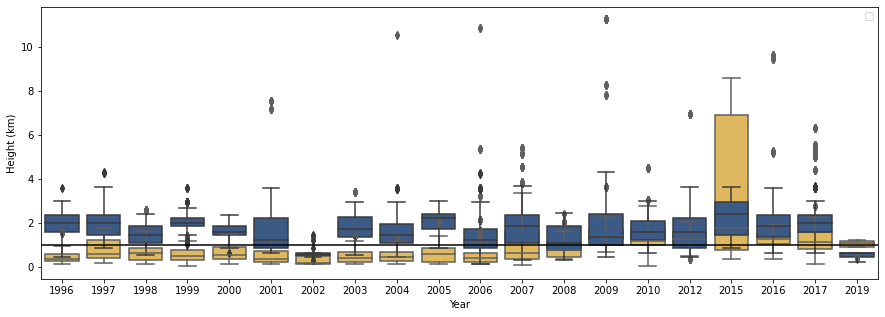

In [30]:
fig, ax = pyplot.subplots(figsize =(15, 5)) 
sns.boxplot(x="Year", y="MeltingLayerHeight",
                 data=df_ML, color='#f4c04a',ax=ax)
sns.boxplot(x="Year", y="Height",
                 data=df_ML, color='#2e5893',ax=ax)
ax.set_ylabel('Height (km)')
ax.axhline(y=1, color='k')
#handles, _ = ax.get_legend_handles_labels() 
#ax.legend(handles, ["label1", "label2"], loc="best")
#ax.legend()

In [53]:
df_ML_radar = df_ML[["DateTime","MeltingLayerHeight","Year","Month","Day"]]
df_ML_era5 = df_ML[["DateTime","Height","Year","Month","Day"]]

df_ML_radar['Source'] = 'Radar'
df_ML_era5['Source'] = 'ERA5'
df_ML_radar.rename(columns={'MeltingLayerHeight':'Height'}, inplace=True)

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [54]:
df_joined = pd.concat([df_ML_era5, df_ML_radar])

In [55]:
df_joined.tail(10)

,DateTime,Height,Year,Month,Day,Source
54602,2019-02-10 13:00:00,0.434,2019,2,10,Radar
54604,2019-02-10 14:00:00,0.434,2019,2,10,Radar
54606,2019-02-10 15:00:00,0.434,2019,2,10,Radar
54608,2019-02-10 16:00:00,0.434,2019,2,10,Radar
54610,2019-02-10 17:00:00,0.434,2019,2,10,Radar
54612,2019-02-10 18:00:00,0.434,2019,2,10,Radar
54616,2019-02-10 20:00:00,0.434,2019,2,10,Radar
54618,2019-02-10 21:00:00,0.434,2019,2,10,Radar
54620,2019-02-10 22:00:00,0.434,2019,2,10,Radar
54622,2019-02-10 23:00:00,0.434,2019,2,10,Radar


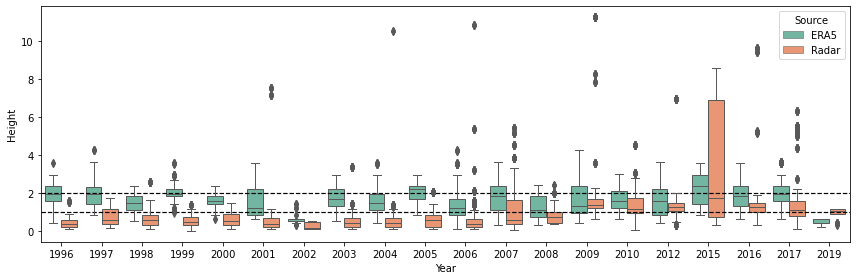

In [71]:
fig, ax = pyplot.subplots(figsize =(12, 4)) 
ax.axhline(y=1, color='k', linestyle='--', linewidth='1.2')
ax.axhline(y=2, color='k', linestyle='--', linewidth='1.2')
ax = sns.boxplot(x="Year", y="Height", hue="Source",
                 data=df_joined, palette="Set2", linewidth=1)
plt.tight_layout()
plt.savefig('Radar_vs_ERA5_MeltingLayerHeight.png',dpi=600)